In [1]:
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd
from pathlib import Path

#compile data
crash_data_path = Path("Crash_Reporting_-_Drivers_Data.csv")
crash_data = pd.read_csv(crash_data_path, low_memory=False)

#reduce to minimal needed stats
crash_data_red = crash_data[["Report Number","Crash Date/Time","Vehicle Year","Vehicle Make","Vehicle Model"]]
crash_data_red.head()

,Report Number,Crash Date/Time,Vehicle Year,Vehicle Make,Vehicle Model
0,MCP3040003N,5/31/2019 15:00,2004,HONDA,TK
1,MCP1307000K,5/24/2019 17:00,0,UNK,UNK
2,MCP2846008X,7/17/2023 10:45,2003,FORD,TK
3,MCP32610017,7/20/2023 23:40,2023,TOYT,CP
4,EJ78520081,7/13/2023 17:40,2001,KENWORTH,TRUCK


In [2]:
#count vehicle make and make data frame
make_counts = crash_data_red["Vehicle Make"].value_counts()

make_df = pd.DataFrame(make_counts)
make_df

,count
Vehicle Make,
TOYOTA,22656
HONDA,18483
FORD,16771
TOYT,8574
NISSAN,8340
...,...
MAZDA 3,1
SURE,1
TOM,1


In [3]:
#clean up data
make_df_clean = crash_data_red["Vehicle Make"].replace({"TOYT": "TOYOTA", "HOND": "HONDA", "CHEV": "CHEVY", "CHEVROLET": "CHEVY"})
make_clean_df = make_df_clean.value_counts()
make_df = pd.DataFrame(make_clean_df)

#reduce to top 10 and drop "UNKNOWN"
make_stats = make_df.loc[(make_df["count"]>2780)]
make_stats = make_stats.drop("UNKNOWN")
make_stats = pd.DataFrame(make_stats).reset_index()
make_stats

,Vehicle Make,count
0,TOYOTA,31230
1,HONDA,24083
2,FORD,16771
3,CHEVY,10469
4,NISSAN,8340
5,DODGE,4423
6,HYUNDAI,3826
7,JEEP,3688
8,BMW,3230
9,ACURA,2785


In [4]:
#Calculate percent chance of each make in a crash
total = crash_data_red["Vehicle Make"].count()
counts = np.array([make_stats["count"].iloc[0], make_stats["count"].iloc[1], make_stats["count"].iloc[2], make_stats["count"].iloc[3], make_stats["count"].iloc[4], make_stats["count"].iloc[5], make_stats["count"].iloc[6], make_stats["count"].iloc[7], make_stats["count"].iloc[8], make_stats["count"].iloc[9]]).astype('int')
int(total)
perc_chance = (counts.astype(int)/total*100).round(1)
perc_chance_df = pd.DataFrame({"Vehicle Make": make_stats["Vehicle Make"],
              "Percent in Crash": perc_chance})
perc_chance_df

,Vehicle Make,Percent in Crash
0,TOYOTA,18.6
1,HONDA,14.3
2,FORD,10.0
3,CHEVY,6.2
4,NISSAN,5.0
5,DODGE,2.6
6,HYUNDAI,2.3
7,JEEP,2.2
8,BMW,1.9
9,ACURA,1.7


In [5]:
#add category for every other make
other = make_df.loc[(make_df["count"]<2780)]
other_sum = other.sum()+3607
other_perc = (other_sum.astype(int)/total*100).round(1)
perc_chance_df.loc[len(perc_chance_df)] = ["Other", other_perc["count"]]
perc_chance_df

,Vehicle Make,Percent in Crash
0,TOYOTA,18.6
1,HONDA,14.3
2,FORD,10.0
3,CHEVY,6.2
4,NISSAN,5.0
5,DODGE,2.6
6,HYUNDAI,2.3
7,JEEP,2.2
8,BMW,1.9
9,ACURA,1.7


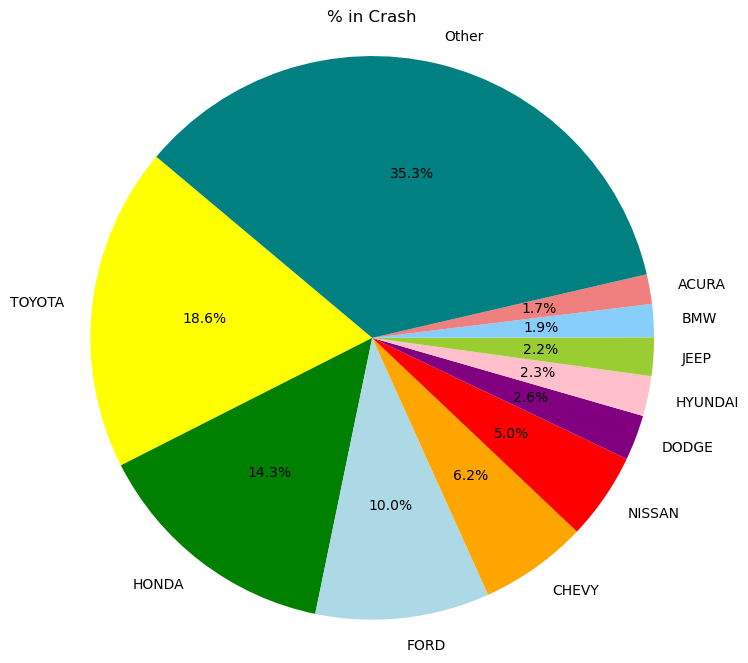

In [24]:
labels = perc_chance_df["Vehicle Make"]
perc_data = perc_chance_df["Percent in Crash"]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","teal"]
plt.figure(figsize=(8,8))
plt.pie(perc_data, explode=None, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("% in Crash")
plt.axis("equal")
plt.savefig("make_pie.png")
plt.show()